# Test 1. My first data science project

## In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.
## You are expected to submit the code developed as well as a brief description of your findings and insights for each assigment AT THE END of the lab. 

## This lab represents 20% of the total marking of the module¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
### Let's load the gapminder dataset
gapminder = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')

In [5]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


### Question 1. Find countries in the american continent with (1) Life Expectancy larger than 65 AND (2) GDP per Capita lower than 4000

In [17]:
gapminder.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [18]:
gapminder[(gapminder['continent']=='Americas')&(gapminder['lifeExp']>=65)&(gapminder['gdpPercap']<=4000)]

,country,continent,year,lifeExp,pop,gdpPercap
143,Bolivia,Americas,2007,65.554,9119152,3822.137084
439,Dominican Republic,Americas,1987,66.046,6655297,2899.842175
440,Dominican Republic,Americas,1992,68.457,7351181,3044.214214
441,Dominican Republic,Americas,1997,69.957,7992357,3614.101285
656,Honduras,Americas,1992,66.399,5077347,3081.694603
657,Honduras,Americas,1997,67.659,5867957,3160.454906
658,Honduras,Americas,2002,68.565,6677328,3099.728660
659,Honduras,Americas,2007,70.198,7483763,3548.330846
1112,Nicaragua,Americas,1992,65.843,4017939,2170.151724
1113,Nicaragua,Americas,1997,68.426,4609572,2253.023004


### Question 2. Compute the average Life Expectancy and GDP Per person for each continent from 1960 to present.

#### Tip: (1) apply a filter, (2) then use groupby

In [10]:
gapminder[(gapminder['year']>=1960)].groupby(['continent','year']).mean()

lifeExp           pop     gdpPercap
continent year                                       
Africa    1962  43.319442  5.702247e+06   1598.078825
          1967  45.334538  6.447875e+06   2050.363801
          1972  47.450942  7.305376e+06   2339.615674
          1977  49.580423  8.328097e+06   2585.938508
          1982  51.592865  9.602857e+06   2481.592960
          1987  53.344788  1.105450e+07   2282.668991
          1992  53.629577  1.267464e+07   2281.810333
          1997  53.598269  1.430448e+07   2378.759555
          2002  53.325231  1.603315e+07   2599.385159
          2007  54.806038  1.787576e+07   3089.032605
Americas  1962  58.398760  1.733081e+07   4901.541870
          1967  60.410920  1.922986e+07   5668.253496
          1972  62.394920  2.117537e+07   6491.334139
          1977  64.391560  2.312271e+07   7352.007126
          1982  66.228840  2.521164e+07   7506.737088
          1987  68.090720  2.731016e+07   7793.400261
          1992  69.568360  2.957096e+07   8044.934406
          1997  71.150480  3.187602e+07   8889.300863
          2002  72.422040  3.399091e+07   9287.677107
          2007  73.608120  3.595485e+07  11003.031625
Asia      1962  51.563223  5.140476e+07   5729.369625
          1967  54.663640  5.774736e+07   5971.173374
          1972  57.319269  6.518098e+07   8187.468699
          1977  59.610556  7.225799e+07   7791.314020
          1982  62.617939  7.909502e+07   7434.135157
          1987  64.851182  8.700669e+07   7608.226508
          1992  66.537212  9.494825e+07   8639.690248
          1997  68.020515  1.025238e+08   9834.093295
          2002  69.233879  1.091455e+08  10174.090397
          2007  70.728485  1.155138e+08  12473.026870
Europe    1962  68.539233  1.534517e+07   8365.486814
          1967  69.737600  1.603930e+07  10143.823757
          1972  70.775033  1.668784e+07  12479.575246
          1977  71.937767  1.723882e+07  14283.979110
          1982  72.806400  1.770890e+07  15617.896551
          1987  73.642167  1.810314e+07  17214.310727
          1992  74.440100  1.860476e+07  17061.568084
          1997  75.505167  1.896480e+07  19076.781802
          2002  76.700600  1.927413e+07  21711.732422
          2007  77.648600  1.953662e+07  25054.481636
Oceania   1962  71.085000  6.641759e+06  12696.452430
          1967  71.310000  7.300207e+06  14495.021790
          1972  71.910000  8.053050e+06  16417.333380
          1977  72.855000  8.619500e+06  17283.957605
          1982  74.290000  9.197425e+06  18554.709840
          1987  75.320000  9.787208e+06  20448.040160
          1992  76.945000  1.045983e+07  20894.045885
          1997  78.190000  1.112072e+07  24024.175170
          2002  79.740000  1.172741e+07  26938.778040
          2007  80.719500  1.227497e+07  29810.188275

### Question 3. Plot the evolution of Life Expectancy and GDP of China, India and Venezuela

#### Tip: consider using Lineplot: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [11]:
sample=gapminder[(gapminder['country']=='China')|(gapminder['country']=='India')|(gapminder['country']=='Venezuela')]

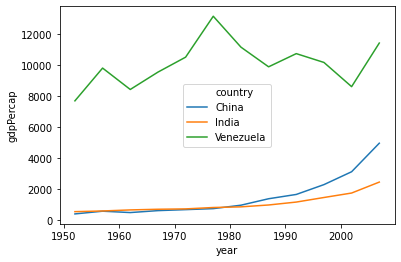

In [12]:
sns.lineplot(x="year", y="gdpPercap", data=sample,hue='country')

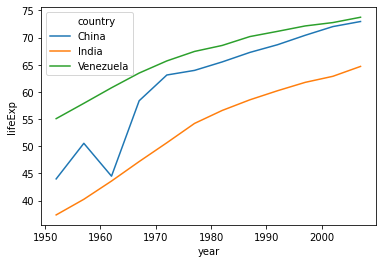

In [13]:
sns.lineplot(x="year", y="lifeExp", data=sample,hue='country')

### Question 4. What is the relationship between Life Expectancy and GDP per Capita in (1) Germany and (2) Spain ?

### Tip: have a look at seaborn-based techniques to represent relationships between two variables.
### check the following link for alternatives: https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

In [14]:
gapminder.sample()

,country,continent,year,lifeExp,pop,gdpPercap
1034,Mozambique,Africa,1962,36.161,7788944,556.686354


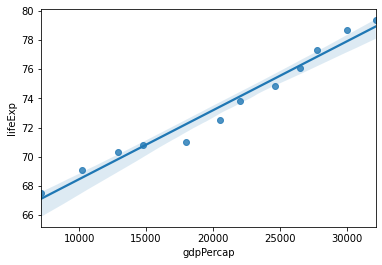

In [15]:
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder[gapminder['country']=='Germany'])

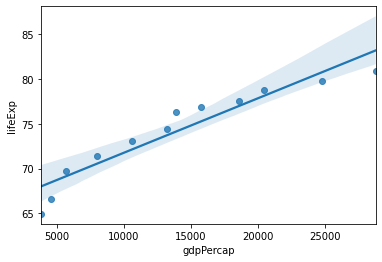

In [16]:
sns.regplot(x="gdpPercap", y="lifeExp", data=gapminder[gapminder['country']=='Spain'])